In [187]:
import pandas as pd     
import matplotlib.pyplot as plt

In [188]:
csv = pd.read_csv("1976-2016-president.csv")
csv1 = pd.read_csv("1980-2014 November General Election - Turnout Rates.csv")
csv2 = pd.read_csv("2016 November General Election - Turnout Rates.csv")
csv.head()

,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party,writein,candidatevotes,totalvotes,version,notes
0,1976,Alabama,AL,1,63,41,US President,"Carter, Jimmy",democrat,False,659170,1182850,20171015,NaN
1,1976,Alabama,AL,1,63,41,US President,"Ford, Gerald",republican,False,504070,1182850,20171015,NaN
2,1976,Alabama,AL,1,63,41,US President,"Maddox, Lester",american independent party,False,9198,1182850,20171015,NaN
3,1976,Alabama,AL,1,63,41,US President,"Bubar, Benjamin """"Ben""""",prohibition,False,6669,1182850,20171015,NaN
4,1976,Alabama,AL,1,63,41,US President,"Hall, Gus",communist party use,False,1954,1182850,20171015,NaN


In [189]:
csv1.rename(columns={"Unnamed: 0": "year", "Denominators" : "Eligible_voting_pop", "Unnamed: 10" : "Voting_age_pop"}, inplace= True)
voting_data_1 = csv1[["year", "State", "Eligible_voting_pop", "Voting_age_pop"]]
voting_data_1 = voting_data_1.drop(voting_data_1.index[0])
voting_data_1


,year,State,Eligible_voting_pop,Voting_age_pop
1,2014,United States,"227,157,964","245,712,915"
2,2014,Alabama,"3,588,783","3,751,844"
3,2014,Alaska,"520,562","553,473"
4,2014,Arizona,"4,510,186","5,110,890"
5,2014,Arkansas,"2,117,881","2,263,040"
...,...,...,...,...
932,1980,Virginia,"3,830,887","3,927,383"
933,1980,Washington,"2,923,670","3,037,193"
934,1980,West Virginia,"1,387,231","1,396,595"
935,1980,Wisconsin,"3,322,053","3,371,087"


In [193]:
csv2.rename(columns={"Denominators" : "Eligible_voting_pop", "Unnamed: 9" : "Voting_age_pop"}, inplace= True)
csv2["year"] = '2016'
voting_data_2 = csv2[["year", "State", "Eligible_voting_pop", "Voting_age_pop"]]
voting_data_2 = voting_data_2.drop(voting_data_2.index[0])
total_voting = voting_data_2.append(voting_data_1)
total_voting

,year,State,Eligible_voting_pop,Voting_age_pop
1,2016,United States,"230,931,921","250,055,734"
2,2016,Alabama,"3,609,447","3,770,142"
3,2016,Alaska,"522,679","555,367"
4,2016,Arizona,"4,740,310","5,331,034"
5,2016,Arkansas,"2,140,097","2,286,625"
...,...,...,...,...
932,1980,Virginia,"3,830,887","3,927,383"
933,1980,Washington,"2,923,670","3,037,193"
934,1980,West Virginia,"1,387,231","1,396,595"
935,1980,Wisconsin,"3,322,053","3,371,087"


In [196]:
total_voting['year'] = total_voting.year.astype(str).astype(int)
total_voting.dtypes

year                    int64
State                  object
Eligible_voting_pop    object
Voting_age_pop         object
dtype: object

In [197]:
csv.dtypes

year                int64
state              object
state_po           object
state_fips          int64
state_cen           int64
state_ic            int64
office             object
candidate          object
party              object
writein              bool
candidatevotes      int64
totalvotes          int64
version             int64
notes             float64
dtype: object

In [216]:
merged_df = csv.merge(total_voting, how='left', left_on=['state','year'], right_on=["State","year"])
merged_df


 

,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party,writein,candidatevotes,totalvotes,version,notes,State,Eligible_voting_pop,Voting_age_pop
0,1976,Alabama,AL,1,63,41,US President,"Carter, Jimmy",democrat,False,659170,1182850,20171015,NaN,NaN,NaN,NaN
1,1976,Alabama,AL,1,63,41,US President,"Ford, Gerald",republican,False,504070,1182850,20171015,NaN,NaN,NaN,NaN
2,1976,Alabama,AL,1,63,41,US President,"Maddox, Lester",american independent party,False,9198,1182850,20171015,NaN,NaN,NaN,NaN
3,1976,Alabama,AL,1,63,41,US President,"Bubar, Benjamin """"Ben""""",prohibition,False,6669,1182850,20171015,NaN,NaN,NaN,NaN
4,1976,Alabama,AL,1,63,41,US President,"Hall, Gus",communist party use,False,1954,1182850,20171015,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3735,2016,Wyoming,WY,56,83,68,US President,NaN,NaN,True,6904,258788,20171015,NaN,Wyoming,"429,682","446,396"
3736,2016,Wyoming,WY,56,83,68,US President,NaN,independent,False,3224,258788,20171015,NaN,Wyoming,"429,682","446,396"
3737,2016,Wyoming,WY,56,83,68,US President,Blank Vote,NaN,False,2661,258788,20171015,NaN,Wyoming,"429,682","446,396"
3738,2016,Wyoming,WY,56,83,68,US President,"Castle, Darrell L.",constitution party,False,2042,258788,20171015,NaN,Wyoming,"429,682","446,396"


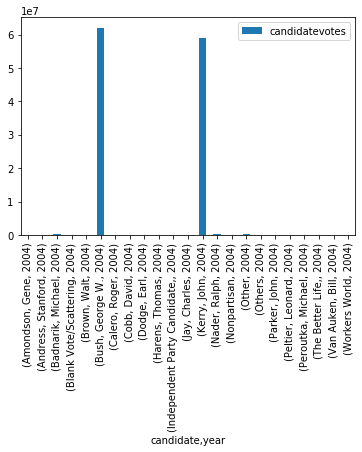

In [155]:
candidate_year = csv[["candidate","candidatevotes", "year"]]
#candidate_year.drop_duplicates(subset=None, keep='first', inplace=True)
candidate_year = candidate_year[candidate_year['year']==2004]
grouped_df = candidate_year.groupby(["candidate", "year"]).sum()
grouped_df.plot(kind="bar")


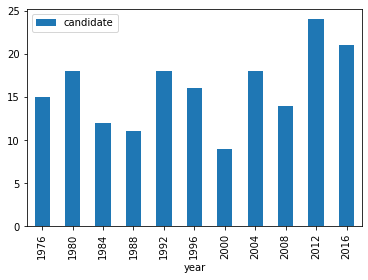

In [149]:
candidate_year = csv[["candidate", "year"]].set_index(["year"])
candidate_year.drop_duplicates(subset=None, keep='first', inplace=True)
grouped_df = candidate_year.groupby(["year"]).count()
grouped_df.plot(kind="bar")

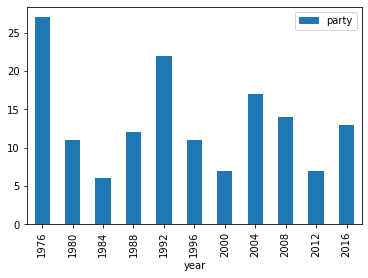

In [150]:
candidate_year = csv[["party", "year"]].set_index(["year"])
candidate_year.drop_duplicates(subset=None, keep='first', inplace=True)
grouped_df = candidate_year.groupby(["year"]).count()
grouped_df.plot(kind="bar")

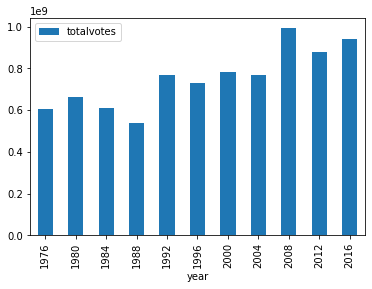

In [151]:
candidate_year = csv[["totalvotes", "year"]].set_index(["year"])
#candidate_year.drop_duplicates(subset=None, keep='first', inplace=True)
grouped_df = candidate_year.groupby(["year"]).sum()
grouped_df.plot(kind="bar")